In [106]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import json 
import ndjson
import os
import random

In [169]:
def load_movies(name):
    df = pd.read_csv(name)
    df['keywords'] = df['keywords'].apply(json.loads)
    return df

def edit_names(keywords):
    return','.join([x['name'] for x in keywords]) 

#gets the category name from the ndjson file name
def get_category_from_filename(filename):
    i = filename.rfind('_')
    filename = filename[i+1:-7]
    return filename

df_categories = pd.read_csv('Categories_List.csv')
#print(df_categories)

movies = load_movies('MoviesList.csv')
tmdb_movies = movies.copy()
tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(edit_names)

df_categories = pd.read_csv('Categories_List.csv')# file with 345 category names
movies = load_movies('MoviesList.csv')
tmdb_movies = movies.copy()
tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(edit_names)

categories = df_categories['Categories']
print("Categories", type(categories))
categories_set = set()
categories_new_set = set()

for obj in tmdb_movies['keywords']:
    list = obj.split(',')
    categories_set.update(list)

# prints the matching categories: Download the files as required
for value in categories_set:
    # if categories.str.contains(value).any(): ->partial match
    if categories.eq(value).any():  # exact match string
        print(value)
        categories_new_set.add(value)

category_count = len(categories_new_set)
print("Total categories= ", len(categories_new_set))

Categories <class 'pandas.core.series.Series'>
cruise ship
penguin
spider
hammer
lion
whale
shark
monkey
ocean
snake
dragon
panda
tiger
zebra
giraffe
Total categories=  15


In [108]:
import csv

movies_df = load_movies('MoviesList.csv') #dataframe
categories_list = categories.tolist()

with open('MoviesListEdited.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(['Name', 'Keywords'])
    for index, row in movies_df.iterrows():
        name = row["original_title"]
        keywords_list = [ sub['name'] for sub in row["keywords"] ] 
        new_list = set(keywords_list) & set(categories_list)
        filewriter.writerow([name, new_list])
        

In [372]:
doodle_dict = dict()
doodles_df = pd.DataFrame()
path = './Doodle_ndjson'  # directory to store all ndjson files

# reads each ndjson one by one from 'Doodle_ndjson' directory
for file in os.listdir(path):
    data_new = []
    data = []

    filename = get_category_from_filename(file)
    print("Reading file "+filename+".......")

    #going through all the files in Doodle_ndjson directory
    with open(path+"/"+file) as f:
        data = ndjson.load(f)  # loads an ndjson as list of doodle data # data[listitem] is <class 'dict'>
        for listitem in range(len(data)):
            # ignoring the items if 'recognized' is False
            if data[listitem]['recognized'] != False:
                data_new.append(data[listitem].get('drawing'))

    # Randomly selecting 100 items from a doodle data list
    data = random.sample(data_new, 100)
    # adding each data list to dictionary <key = category_name> <value = data>
    doodle_dict[filename] = data

print('Done!')
#print(doodle_dict['shark']) #to see format of one entry in dict
###################################
# There is no data for ship

Reading file cruise ship.......
Reading file dragon.......
Reading file giraffe.......
Reading file hammer.......
Reading file lion.......
Reading file monkey.......
Reading file ocean.......
Reading file panda.......
Reading file penguin.......
Reading file shark.......
Reading file snake.......
Reading file spider.......
Reading file tiger.......
Reading file whale.......
Reading file zebra.......
Done!


In [375]:
doodle_dict_c = doodle_dict.copy()

val = doodle_dict_c.get('cruise ship')

# doodle_dict['cruise ship'] = val.pop(0)
val[1]

[[[61, 60, 86, 143, 217, 247, 249, 255],
  [141, 138, 136, 138, 143, 151, 128, 103]],
 [[64, 29, 0, 9, 41, 106, 205, 254], [142, 119, 94, 89, 89, 101, 96, 105]],
 [[31, 32, 35, 52, 100, 125, 128, 130, 125],
  [91, 64, 60, 60, 70, 71, 73, 86, 108]],
 [[132, 116, 116, 120], [104, 26, 10, 0]]]

In [371]:
val_m = doodle_dict_c.get('monkey')
len(val_m)

100

In [367]:
doodle_dict_c['cruise ship']

[[[10, 10, 14, 26, 36, 82, 165, 193, 219, 242, 255, 255, 250, 235, 173, 72, 0],
  [92,
   112,
   127,
   147,
   156,
   169,
   183,
   184,
   174,
   154,
   116,
   100,
   88,
   82,
   86,
   86,
   82]],
 [[143, 154, 156, 163, 216, 224, 221], [83, 4, 0, 0, 10, 67, 86]],
 [[175, 175, 179, 204, 206, 203, 175], [31, 40, 42, 44, 41, 30, 32]]]

In [376]:
# print(doodle_dict["whale"]) #to see format of one entry in dict
#print(doodle_dict['whale'])
doodles_df = pd.DataFrame(doodle_dict)
doodles_df.head(3)

,cruise ship,dragon,giraffe,hammer,lion,monkey,ocean,panda,penguin,shark,snake,spider,tiger,whale,zebra
0,"[[[0, 8, 18, 40, 61, 90, 107, 107, 19, 2], [47...","[[[116, 92, 77, 84, 107, 75, 82, 119], [10, 9,...","[[[24, 5, 0, 0, 10, 29, 54, 61, 68, 63, 71, 74...","[[[72, 61, 47], [255, 188, 63]], [[50, 50], [5...","[[[48, 48, 53, 83, 87, 87, 77, 114, 128, 109, ...","[[[57, 59, 69, 82, 101, 121, 145, 152, 170, 17...","[[[0, 11, 23, 40, 74], [3, 0, 8, 2, 2]], [[15,...","[[[52, 48, 41, 34, 30, 30, 45, 58, 74, 98, 121...","[[[71, 66, 67, 96, 107, 100, 79, 67], [71, 97,...","[[[107, 165, 228, 250, 255, 252, 221], [36, 31...","[[[0, 10, 36, 57, 69, 79, 86, 89, 92, 97, 116,...","[[[145, 138, 122, 87, 73, 71, 81, 90, 103, 111...","[[[76, 52, 24, 3, 0, 6, 37, 45, 52, 82, 106, 1...","[[[61, 119, 152, 193, 201, 209, 207, 197, 187,...","[[[71, 63, 57, 54, 60, 76, 84, 88, 82], [28, 2..."
1,"[[[61, 60, 86, 143, 217, 247, 249, 255], [141,...","[[[54, 40, 0, 53, 32, 12, 26, 14, 42, 19, 27, ...","[[[81, 81, 92, 109, 174, 199, 218, 232, 222, 2...","[[[17, 3, 0, 0, 8, 30, 70, 137], [3, 6, 12, 29...","[[[6, 1, 3, 29], [113, 115, 120, 123]], [[23, ...","[[[44, 30, 18, 12, 12, 17, 36], [85, 93, 107, ...","[[[0, 67, 104, 128, 155, 196, 227, 255], [19, ...","[[[69, 61, 61, 71, 81, 93, 98, 102, 103, 92, 7...","[[[50, 51, 67, 84, 95, 99, 98, 88, 76, 64, 56,...","[[[115, 115, 133, 152, 162, 166, 165, 155, 136...","[[[255, 246, 177, 157, 116, 70, 54, 25, 13, 0,...","[[[123, 104, 97, 94, 101, 109, 127, 142, 146, ...","[[[20, 14, 7, 1, 20], [13, 12, 17, 37, 59]], [...","[[[130, 109, 81, 54, 27, 6, 0, 7, 25, 40, 77, ...","[[[64, 57, 52, 48, 51, 63, 78, 86, 87, 84, 77,..."
2,"[[[2, 171, 249], [33, 33, 28]], [[0, 21, 167, ...","[[[34, 30, 39, 43, 50, 82, 83], [16, 3, 7, 2, ...","[[[24, 13, 0, 8, 32, 47, 57, 93, 108, 115, 136...","[[[62, 61, 67], [255, 211, 69]], [[68, 56, 37,...","[[[103, 87, 65, 54, 43, 43, 49, 63, 98, 123, 1...","[[[62, 32, 24, 19, 19, 27, 47, 77, 90, 103, 10...","[[[0, 33, 67, 72, 79, 85, 139, 158, 208, 230, ...","[[[55, 55, 59, 72, 81, 102, 129, 158, 175, 204...","[[[38, 61, 93, 103, 115, 126, 132, 141, 160, 1...","[[[167, 115, 99], [46, 41, 47]], [[123, 121, 1...","[[[0, 27, 34, 49, 60, 71, 110, 120, 139, 151, ...","[[[148, 133, 115, 101, 92, 91, 101, 113, 135, ...","[[[201, 182, 177, 176, 184, 204, 223, 234, 255...","[[[1, 5, 10, 28, 56, 86, 110, 119, 133, 151, 1...","[[[56, 54, 48, 65, 69, 64, 68], [114, 161, 189..."


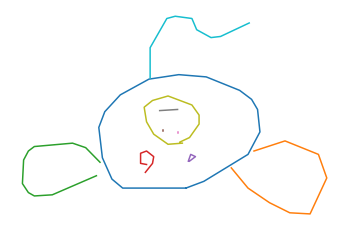

In [377]:
# multiple images of a category are stored under one column

x = doodles_df.iloc[20, 5]
x_length = len(x)

for i in range(x_length):
    plt.plot(x[i][0], x[i][1])
    plt.axis('off')
  
plt.savefig('shark_1.png')
plt.show()

In [385]:
df1 = doodles_df.transpose()

In [386]:
# df1 = df1.reset_index()
# y = df1.iloc[:, 0]
# x = df1.iloc[:, 1:]
# x.shape
df1 = df1.stack()
df1 = df1.reset_index()
df1 = df1.drop('level_1', axis = 1)
df1.columns = ['keyword', 'sketch']
df1

,keyword,sketch
0,cruise ship,"[[[0, 8, 18, 40, 61, 90, 107, 107, 19, 2], [47..."
1,cruise ship,"[[[61, 60, 86, 143, 217, 247, 249, 255], [141,..."
2,cruise ship,"[[[2, 171, 249], [33, 33, 28]], [[0, 21, 167, ..."
3,cruise ship,"[[[3, 34, 114, 249, 252, 254, 249, 207, 204, 1..."
4,cruise ship,"[[[12, 13, 24, 52, 96, 157, 190, 218, 242, 243..."
...,...,...
1495,zebra,"[[[153, 163, 197, 213, 223, 244, 252, 255, 244..."
1496,zebra,"[[[33, 4, 0, 3, 13, 40, 62, 73, 72, 84, 90, 92..."
1497,zebra,"[[[14, 8, 4, 4, 10, 15, 22, 27, 40, 47, 75, 80..."
1498,zebra,"[[[12, 3, 0, 4, 25], [23, 28, 37, 40, 41]], [[..."


In [390]:
df1.loc[1, 'sketch'][0]

[[61, 60, 86, 143, 217, 247, 249, 255],
 [141, 138, 136, 138, 143, 151, 128, 103]]

In [406]:
# train_x and train_y, test_x and test_y

from sklearn import model_selection
train_x, test_x,  train_y, test_y = model_selection.train_test_split(df1.sketch, df1.keyword, test_size = 0.3)
train_x

1008    [[[2, 3, 18, 85, 94, 114, 125, 140, 241], [20,...
678     [[[0, 21, 52, 90, 163, 220], [12, 10, 0, 11, 9...
1123    [[[117, 105, 85, 67, 63, 72, 85, 118, 151, 157...
1028    [[[121, 104, 95, 71, 62, 43, 33, 29, 31, 46, 7...
1031    [[[4, 0, 2, 11, 30, 54, 81, 115, 172, 207, 216...
                              ...                        
1000    [[[0, 10, 36, 57, 69, 79, 86, 89, 92, 97, 116,...
487     [[[131, 126, 117, 97, 88, 80, 77, 78, 82, 100,...
93      [[[42, 53], [43, 83]], [[43, 51, 72, 89, 105, ...
418     [[[127, 115, 101, 77, 60, 47, 38, 29, 35, 46, ...
1164    [[[117, 106, 75, 68, 61, 60, 68, 81, 97, 135, ...
Name: sketch, Length: 1050, dtype: object

In [407]:
# need to reshape train and test x datas
train_x.shape

(1050,)

In [476]:
# grab a picture data

picture = train_x[0]
train_x[0]

[[[0, 8, 18, 40, 61, 90, 107, 107, 19, 2],
  [47, 71, 85, 96, 98, 82, 65, 60, 51, 46]],
 [[41, 41], [52, 31]],
 [[52, 52], [55, 31]],
 [[55, 55, 49, 34, 34], [37, 3, 0, 2, 35]],
 [[30, 54], [36, 32]],
 [[56, 78, 77, 68, 63, 50], [31, 61, 32, 10, 4, 2]],
 [[29, 29], [14, 14]],
 [[140, 143, 156, 185, 205, 217, 237, 254, 255, 251],
  [51, 65, 81, 99, 103, 99, 80, 40, 32, 29]]]

In [485]:
# find the length of all the individual drawings of the picture
sketch_length = []
for draw in picture:
    sketch_length.append(len(draw[0]))

total_points = sum(sketch_length)
sketch_length

[10, 2, 2, 5, 2, 6, 2, 10]

In [486]:
# make a blank array that takes the x, y and end points of the picture

pic_array = np.zeros((total_points, 3), dtype = np.float32)
pic_array.shape

(39, 3)

In [487]:
# Do through each line of drawing and put it as the x and y values of the empty array.
# if at the last list, mark the 3rd column as 1 (1 = end).

position = 0

for draw in picture:
    for i in [0, 1]:
        pic_array[position:(position + len(draw[0])), i] = draw[i]
    position += len(draw[0])
    pic_array[position-1, 2] = 1

In [488]:
# example of what the array looks like
pic_array

array([[  0.,  47.,   0.],
       [  8.,  71.,   0.],
       [ 18.,  85.,   0.],
       [ 40.,  96.,   0.],
       [ 61.,  98.,   0.],
       [ 90.,  82.,   0.],
       [107.,  65.,   0.],
       [107.,  60.,   0.],
       [ 19.,  51.,   0.],
       [  2.,  46.,   1.],
       [ 41.,  52.,   0.],
       [ 41.,  31.,   1.],
       [ 52.,  55.,   0.],
       [ 52.,  31.,   1.],
       [ 55.,  37.,   0.],
       [ 55.,   3.,   0.],
       [ 49.,   0.,   0.],
       [ 34.,   2.,   0.],
       [ 34.,  35.,   1.],
       [ 30.,  36.,   0.],
       [ 54.,  32.,   1.],
       [ 56.,  31.,   0.],
       [ 78.,  61.,   0.],
       [ 77.,  32.,   0.],
       [ 68.,  10.,   0.],
       [ 63.,   4.,   0.],
       [ 50.,   2.,   1.],
       [ 29.,  14.,   0.],
       [ 29.,  14.,   1.],
       [140.,  51.,   0.],
       [143.,  65.,   0.],
       [156.,  81.,   0.],
       [185.,  99.,   0.],
       [205., 103.,   0.],
       [217.,  99.,   0.],
       [237.,  80.,   0.],
       [254.,  40.,   0.],
 

In [489]:
# Normalize the data in pic_array

lowest_val = np.min(pic_array[:, :2])
highest_val = np.max(pic_array[:, :2])

value_range = highest_val - lowest_val

# avoid divide by zero

if value_range == 0:
    value_range = 1
    
pic_array[:, :2] = pic_array[:, :2]/value_range

pic_array

array([[0.        , 0.18431373, 0.        ],
       [0.03137255, 0.2784314 , 0.        ],
       [0.07058824, 0.33333334, 0.        ],
       [0.15686275, 0.3764706 , 0.        ],
       [0.23921569, 0.38431373, 0.        ],
       [0.3529412 , 0.32156864, 0.        ],
       [0.41960785, 0.25490198, 0.        ],
       [0.41960785, 0.23529412, 0.        ],
       [0.07450981, 0.2       , 0.        ],
       [0.00784314, 0.18039216, 1.        ],
       [0.16078432, 0.20392157, 0.        ],
       [0.16078432, 0.12156863, 1.        ],
       [0.20392157, 0.21568628, 0.        ],
       [0.20392157, 0.12156863, 1.        ],
       [0.21568628, 0.14509805, 0.        ],
       [0.21568628, 0.01176471, 0.        ],
       [0.19215687, 0.        , 0.        ],
       [0.13333334, 0.00784314, 0.        ],
       [0.13333334, 0.13725491, 1.        ],
       [0.11764706, 0.14117648, 0.        ],
       [0.21176471, 0.1254902 , 1.        ],
       [0.21960784, 0.12156863, 0.        ],
       [0.

In [483]:
# pic_array[1:, 0:2] -= pic_array[0:-1, 0:2]
# pic_array

In [565]:
# def change_pic_from_dict_to_array(df):
#     new_df = []
#     for i in range(df.shape[0]):
#         picture = df.iloc[i]
        
#         # find the length of all the individual drawings of the picture
#         sketch_length = []
#         for draw in picture:
#             sketch_length.append(len(draw[0]))

#         total_points = sum(sketch_length)
        
#         # make a blank array that takes the x, y and end points of the picture

#         pic_array = np.zeros((total_points, 3), dtype = np.float32)
        
#         # go through each line of drawing and put it as the x and y values of the empty array.
#         # if at the last list, mark the 3rd column as 1 (1 = end).

#         position = 0

#         for draw in picture:
#             for i in [0, 1]:
#                 pic_array[position:(position + len(draw[0])), i] = draw[i]
#             position += len(draw[0])
#             pic_array[position-1, 2] = 1

#         # Normalize the data in pic_array

#         lowest_val = np.min(pic_array[:, :2])
#         highest_val = np.max(pic_array[:, :2])

#         value_range = highest_val - lowest_val

#         # avoid divide by zero

#         if value_range == 0:
#             value_range = 1

#         pic_array[:, :2] = pic_array[:, :2]/value_range
        
#         new_df.append(pic_array)
        
#     return new_df

In [547]:
# def change_pic_from_dict_to_array_test(df):
    
#     for i in range(df.shape[0]):
#         picture = df.iloc[i]
        
#         # find the length of all the individual drawings of the picture
#         sketch_length = []
#         for draw in picture:
#             sketch_length.append(len(draw[0]))

#         total_points = sum(sketch_length)
        
#         # make a blank array that takes the x, y and end points of the picture

#         pic_array = np.zeros((total_points, 3), dtype = np.float32)
        
#         # go through each line of drawing and put it as the x and y values of the empty array.
#         # if at the last list, mark the 3rd column as 1 (1 = end).

#         position = 0

#         for draw in picture:
#             for i in [0, 1]:
#                 pic_array[position:(position + len(draw[0])), i] = draw[i]
#             position += len(draw[0])
#             pic_array[position-1, 2] = 1

#         # Normalize the data in pic_array

#         lowest_val = np.min(pic_array[:, :2])
#         highest_val = np.max(pic_array[:, :2])

#         value_range = highest_val - lowest_val

#         # avoid divide by zero

#         if value_range == 0:
#             value_range = 1

#         pic_array[:, :2] = pic_array[:, :2]/value_range
        
#     return new_df

In [568]:
# get longest length of drawings

def longest_stroke(df):
    
    drawing_length = []
    for i in range(df.shape[0]):
        picture = df.iloc[i]
        
        # find the length of all the individual drawings of the picture
        sketch_length = []
        for draw in picture:
            sketch_length.append(len(draw[0]))

        total_points = sum(sketch_length)
        drawing_length.append(total_points)
        
#     print(drawing_length)

    return np.max(drawing_length)

In [566]:
def change_pic_from_dict_to_array(df, max_sketch_length):
    
    pic_final = np.zeros((df.shape[0], max_sketch_length, 3), dtype = np.float32)
    
    for i in range(df.shape[0]):
        
        picture = df.iloc[i]
        
        # find the length of all the individual drawings of the picture
#         sketch_length = []
#         for draw in picture:
#             sketch_length.append(len(draw[0]))

#         total_points = sum(sketch_length)
        
        # make a blank array that takes the x, y and end points of the picture

        pic_array = np.zeros((max_sketch_length, 3), dtype = np.float32)
        
        # go through each line of drawing and put it as the x and y values of the empty array.
        # if at the last list, mark the 3rd column as 1 (1 = end).

        position = 0

        for draw in picture:
            for i in [0, 1]:
                pic_array[position:(position + len(draw[0])), i] = draw[i]
            position += len(draw[0])
            pic_array[position-1, 2] = 1

        # Normalize the data in pic_array

        lowest_val = np.min(pic_array[:, :2])
        highest_val = np.max(pic_array[:, :2])

        value_range = highest_val - lowest_val

        # avoid divide by zero

        if value_range == 0:
            value_range = 1

        pic_array[:, :2] = pic_array[:, :2]/value_range
        
        pic_final[i] = pic_array
        
    return pic_final

In [571]:
max_train_x = longest_stroke(train_x)
max_test_x = longest_stroke(test_x)
max_test_x

327

In [575]:
train_x_final = change_pic_from_dict_to_array(train_x, max_train_x)
test_x_final = change_pic_from_dict_to_array(test_x, max_test_x)
test_x_final.shape

(450, 327, 3)

In [582]:
train_x_final[1, :, :]

array([[0.45882353, 0.24313726, 0.        ],
       [0.41568628, 0.24313726, 0.        ],
       [0.29411766, 0.35686275, 0.        ],
       [0.26666668, 0.40392157, 0.        ],
       [0.23921569, 0.45882353, 0.        ],
       [0.23529412, 0.60784316, 0.        ],
       [0.26666668, 0.6745098 , 0.        ],
       [0.31764707, 0.7176471 , 0.        ],
       [0.38039216, 0.73333335, 0.        ],
       [0.5294118 , 0.7411765 , 0.        ],
       [0.5921569 , 0.7176471 , 0.        ],
       [0.6784314 , 0.65882355, 0.        ],
       [0.7176471 , 0.5647059 , 0.        ],
       [0.7176471 , 0.49411765, 0.        ],
       [0.5411765 , 0.3372549 , 0.        ],
       [0.5411765 , 0.21176471, 0.        ],
       [0.5019608 , 0.16470589, 0.        ],
       [0.47843137, 0.16470589, 0.        ],
       [0.47843137, 0.18431373, 0.        ],
       [0.5764706 , 0.16862746, 0.        ],
       [0.76862746, 0.07843138, 0.        ],
       [0.87058824, 0.        , 0.        ],
       [0.

In [588]:
train_x_final

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.45882353, 0.24313726, 0.        ],
        [0.41568628, 0.24313726, 0.        ],
        [0.29411766, 0.35686275, 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [605]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(5, kernel_size=300, activation='relu'))
model.add(tf.keras.layers.Conv1D(64, kernel_size=20, activation='relu'))
model.add(tf.keras.layers.Conv1D(64, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(680, activation='relu'))
model.add(tf.keras.layers.Dense(category_count, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [603]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           (None, 28, 5)             4505      
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 9, 64)             6464      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 1, 64)             36928     
_________________________________________________________________
flatten_21 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 680)               44200     
_________________________________________________________________
dense_40 (Dense)             (None, 15)                10215     
Total params: 102,312
Trainable params: 102,312
Non-trainable params: 0
_______________________________________________

In [606]:
model.fit(train_x_array, train_y)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# get values from softmax

model.predict(pict)

In [ ]:
# build the classification model 

# pass data through convolutional layers

convoluted_input = train_x.shape[0] # based on train_x data
num_convolutions =  # filter values
length_convolutions = 10 # kernel values

# normalize picture data
convoluted_input = tf.keras.layers.BatchNormalization(convoluted_input, trainable = False)

# create model
model = tf.keras.models.Sequential()

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                           kernel_size = length_convolutions,
                           strides = 1,
                           activation = None, 
                           use_bias = True))

#model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))

# re-evaluate size / convolution of image

num_convolutions = 6 # filter values
length_convolutions = 8 # kernel values

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                           kernel_size = length_convolutions,
                           strides = 1,
                           activation = None, 
                           use_bias = True))

# re-evaluate size / convolution of image
num_convolutions = 14 # filter values
length_convolutions = 5 # kernel values

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                           kernel_size = length_convolutions,
                           strides = 1,
                           activation = None, 
                           use_bias = True))

######################### end ###############################

# flatten and classify

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))

model.add(tf.keras.layers.Dense(15, activation = 'softmax'))

######################### can potentially add movie classification to this model here

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    

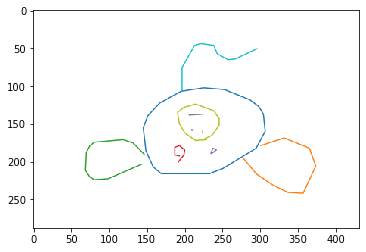

In [402]:
fname = "shark_1.png"

img = plt.imread(fname)
plt.imshow(img)

# numRows, numCols, numChannels = img.shape
# numPixels = numRows * numCols

# numFeatures = 5

# pic_array = np.zeros((numPixels, numFeatures))

# idx = 0

# for i in range(numRows):
#     for j in range(numCols):
        
#         pic_array[idx,0:3] = img[i,j,:]
#         pic_array[idx,3] = i
#         pic_array[idx,4] = j
        
#         idx = idx + 1

# pic_array = np.double(X)
# means = np.mean(X, axis = 0)
# standardDevs = np.std(X, axis = 0)

# pic_array = (X-means)/standardDevs #normalizing the data
means = np.mean(img)
standardDevs = np.std(img)

img = (img-means)/standardDevs #normalizing the data

In [403]:
# shapes = features["shape"]
# lengths = tf.squeeze(
#     tf.slice(shapes, begin=[0, 0], size=[params["batch_size"], 1]))
# inks = tf.reshape(
#     tf.sparse_tensor_to_dense(features["ink"]),
#     [params["batch_size"], -1, 3])
# if targets is not None:
#   targets = tf.squeeze(targets)
img.shape

(288, 432, 4)

In [250]:
pic_label = ['shark']
pic_label = pd.DataFrame(pic_label)
imgx = img.shape[0]
imgy = img.shape[1]
imgz = img.shape[2]
img = np.reshape(img, (-1, 32, 32, 3))
img.shape

(162, 32, 32, 3)

In [251]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(680, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(category_count, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 680)             

In [252]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [253]:
model.fit(x=img, y=pic_label,
          batch_size = 32,
          epochs = 22)

ValueError: Input arrays should have the same number of samples as target arrays. Found 162 input samples and 1 target samples.

In [264]:
train_x = train_x.reshape(1, 1050, 1, 1)
train_x.iloc[1, :]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [261]:
# normalize picture data

input_l = train_x.shape[0]
input_w = train_x.shape[1]

convoluted_input = tf.keras.layers.BatchNormalization(1, trainable = False)

# create model
model = tf.keras.models.Sequential()

# 1D convolution on images
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = 1, activation = None, use_bias = True,
                                 input_shape = (input_l, input_w)))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# predictions = model.fit(train_x, train_y)


ValueError: Input 0 of layer conv2d_23 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 1, 1050]

In [ ]:
predictions = model.fit(train_x, train_y)

In [ ]:
model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)

In [647]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(14, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [649]:
y_train[1:10]

array([0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [640]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 14)        770       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 14)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 350)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                22464     
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

In [643]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [644]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 64)

test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 520us/sample - loss: 0.6065 - accuracy: 0.7837
Epoch 2/5
60000/60000 [==============================] - 31s 518us/sample - loss: 0.4153 - accuracy: 0.8513- loss: 0.4153 - accuracy: 0.
Epoch 3/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.3685 - accuracy: 0.8679
Epoch 4/5
60000/60000 [==============================] - 33s 553us/sample - loss: 0.3384 - accuracy: 0.8786
Epoch 5/5
10000/10000 [==============================] - 4s 399us/sample - loss: 0.3622 - accuracy: 0.8637 - loss: 0.3646 - accu


(0.3622121031284332, 0.8637)

In [619]:
val = model.predict(x_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [645]:
val[0]

array([6.8736963e-06, 1.4511286e-07, 1.3656431e-06, 2.5868229e-07,
       1.2391682e-06, 2.8979639e-03, 4.6316571e-05, 1.2361527e-02,
       5.4407478e-03, 9.7924358e-01], dtype=float32)

In [634]:
idx = np.where(val[60] == np.max(val[60]))
np.max(val[60]), idx

(0.988371, (array([7], dtype=int64),))

In [633]:
y_test[60]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
def predict_val(model, index_test_df, test_df):
    val = model.predict(test_df)
    idx = np.where(val[index_test_df] == np.max(val[index_test_df]))
    
    # what keyword is at idx? return that. 


In [ ]:
def predict_movie(movies, pic_df, img_list):
    predict = []
    for i in img_list:
        predict.append(predict_val(model, i, pic_df))
    
    # keywords in predict. using this, get the movie/movies
    